In [78]:
from statsbombpy import sb
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [3]:
# !pip install statsbombpy

In [44]:
c = sb.competitions()

In [45]:
c.shape

(42, 12)

In [142]:
c.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [47]:
sb.matches(competition_id=16,season_id=4)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,22912,2019-06-01,21:00:00.000,Europe - Champions League,2018/2019,Tottenham Hotspur,Liverpool,0,2,available,...,2021-06-13T16:17:31.694,13,Final,Estádio Cívitas Metropolitano,Damir Skomina,Mauricio Roberto Pochettino Trossero,Jürgen Klopp,1.1.0,2,2


In [48]:
events = sb.events(match_id = 22912 )

In [49]:
events.shape

(3165, 88)

In [50]:
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected

In [141]:
events['type'].value_counts()

Pass                 890
Ball Receipt*        846
Carry                669
Pressure             314
Ball Recovery        100
Duel                  56
Clearance             51
Goal Keeper           38
Shot                  30
Block                 25
Miscontrol            22
Dispossessed          19
Interception          15
Foul Committed        15
Dribble               15
Foul Won              12
Dribbled Past         10
50/50                  6
Substitution           6
Shield                 5
Half Start             4
Injury Stoppage        4
Tactical Shift         4
Half End               4
Starting XI            2
Referee Ball-Drop      2
Offside                1
Name: type, dtype: int64

In [136]:
events['pass_type'].value_counts()

Recovery        113
Throw-in         54
Goal Kick        19
Corner           17
Free Kick        14
Kick Off          4
Interception      4
Name: pass_type, dtype: int64

In [51]:
events['shot_type'].value_counts()

Open Play    28
Penalty       1
Free Kick     1
Name: shot_type, dtype: int64

In [52]:
events['shot_type'].value_counts()

Open Play    28
Penalty       1
Free Kick     1
Name: shot_type, dtype: int64

In [140]:
events1 = events[['team','type','location','pass_end_location','player','minute','pass_recipient']]
events1.head(10)

,team,type,location,pass_end_location,player,minute,pass_recipient
0,Tottenham Hotspur,Starting XI,NaN,NaN,NaN,0,NaN
1,Liverpool,Starting XI,NaN,NaN,NaN,0,NaN
2,Liverpool,Half Start,NaN,NaN,NaN,0,NaN
3,Tottenham Hotspur,Half Start,NaN,NaN,NaN,0,NaN
4,Liverpool,Half Start,NaN,NaN,NaN,45,NaN
5,Tottenham Hotspur,Half Start,NaN,NaN,NaN,45,NaN
6,Liverpool,Pass,"[61.0, 41.0]","[34.9, 44.7]",Jordan Brian Henderson,0,Joël Andre Job Matip
7,Liverpool,Pass,"[37.0, 44.9]","[87.5, 4.4]",Joël Andre Job Matip,0,Sadio Mané
8,Tottenham Hotspur,Pass,"[33.5, 76.6]","[54.5, 65.9]",Kieran Trippier,0,Harry Kane
9,Liverpool,Pass,"[66.5, 15.1]","[83.7, 18.0]",Fábio Henrique Tavares,0,Roberto Firmino Barbosa de Oliveira


In [200]:
spurs = events1[events1['team']=='Tottenham Hotspur'].reset_index()

In [233]:
spurs['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Duel', 'Pressure', 'Foul Committed', 'Shot', 'Goal Keeper',
       'Clearance', 'Ball Recovery', 'Foul Won', 'Interception',
       'Miscontrol', 'Dispossessed', 'Dribbled Past', 'Dribble', '50/50',
       'Block', 'Shield', 'Injury Stoppage', 'Referee Ball-Drop',
       'Half End', 'Substitution', 'Tactical Shift', 'Offside'],
      dtype=object)

In [201]:
# spurs_data = spurs[ ( spurs['location'].notna() & spurs['pass_end_location'].notna() )  ]

In [234]:
spurs_data = spurs[ ( spurs['type']=='Pass') | ( spurs['type']=='Shot' ) | ( spurs['type']=='Ball Receipt*' )  ]

In [235]:
spurs_passes = spurs_data

In [236]:
# spurs_passes = spurs_data[spurs_data['type']=='Pass'].reset_index(drop=True)

In [237]:
spurs_passes

,index,team,type,location,pass_end_location,player,minute,pass_recipient
3,8,Tottenham Hotspur,Pass,"[33.5, 76.6]","[54.5, 65.9]",Kieran Trippier,0,Harry Kane
4,10,Tottenham Hotspur,Pass,"[37.3, 63.0]","[44.9, 60.7]",Moussa Sissoko,0,Harry Winks
5,12,Tottenham Hotspur,Pass,"[33.7, 59.8]","[60.6, 60.5]",Toby Alderweireld,0,Harry Kane
6,17,Tottenham Hotspur,Pass,"[60.0, 40.0]","[43.4, 40.3]",Harry Kane,2,Bamidele Alli
7,18,Tottenham Hotspur,Pass,"[42.8, 40.3]","[106.2, 58.8]",Bamidele Alli,2,NaN
...,...,...,...,...,...,...,...,...
1671,2819,Tottenham Hotspur,Shot,"[104.0, 16.9]",NaN,Christian Dannemann Eriksen,84,NaN
1672,2820,Tottenham Hotspur,Shot,"[112.2, 42.0]",NaN,Lucas Rodrigues Moura da Silva,84,NaN
1673,2823,Tottenham Hotspur,Shot,"[96.9, 27.2]",NaN,Danny Rose,91,NaN
1674,2824,Tottenham Hotspur,Shot,"[104.5, 24.8]",NaN,Heung-Min Son,92,NaN


In [238]:
%%time
spurs_passes['x']=''
spurs_passes['y']=''

spurs_passes['endX']=''
spurs_passes['endY']=''

for i in range(spurs_passes.shape[0]):
    try:
        spurs_passes['x'].iloc[i]=spurs_passes['location'].iloc[i][0]
        spurs_passes['y'].iloc[i]=spurs_passes['location'].iloc[i][1]
        spurs_passes['endX'].iloc[i]=spurs_passes['pass_end_location'].iloc[i][0]
        spurs_passes['endY'].iloc[i]=spurs_passes['pass_end_location'].iloc[i][1]
    except:
        pass
# spurs_passes['location'].iloc[0][0]

CPU times: user 43.3 s, sys: 3.19 s, total: 46.5 s
Wall time: 50.9 s


In [239]:
spurs_passes['player'].value_counts()

Jan Vertonghen                    143
Toby Alderweireld                 138
Kieran Trippier                   119
Hugo Lloris                       102
Christian Dannemann Eriksen        97
Bamidele Alli                      91
Harry Winks                        91
Danny Rose                         85
Heung-Min Son                      78
Moussa Sissoko                     67
Harry Kane                         58
Eric Dier                          21
Lucas Rodrigues Moura da Silva     17
Fernando Llorente Torres           14
Name: player, dtype: int64

In [302]:
spurs_passes[spurs_passes['x']>=30]['player'].value_counts()

Kieran Trippier                   104
Christian Dannemann Eriksen        93
Bamidele Alli                      90
Jan Vertonghen                     81
Harry Winks                        81
Danny Rose                         79
Heung-Min Son                      74
Toby Alderweireld                  70
Harry Kane                         58
Moussa Sissoko                     57
Eric Dier                          21
Lucas Rodrigues Moura da Silva     17
Fernando Llorente Torres           14
Name: player, dtype: int64

In [306]:
spurs_son_passes = spurs_passes[spurs_passes['player']=='Christian Dannemann Eriksen'].reset_index(drop=True)

In [307]:
spurs_son_passes[spurs_son_passes['type']=='Ball Receipt*']

,index,team,type,location,pass_end_location,player,minute,pass_recipient,x,y,endX,endY
45,916,Tottenham Hotspur,Ball Receipt*,"[63.8, 64.2]",NaN,Christian Dannemann Eriksen,3,NaN,63.8,64.2,,
46,934,Tottenham Hotspur,Ball Receipt*,"[28.3, 60.9]",NaN,Christian Dannemann Eriksen,4,NaN,28.3,60.9,,
47,965,Tottenham Hotspur,Ball Receipt*,"[71.1, 31.0]",NaN,Christian Dannemann Eriksen,7,NaN,71.1,31.0,,
48,1016,Tottenham Hotspur,Ball Receipt*,"[106.2, 68.4]",NaN,Christian Dannemann Eriksen,13,NaN,106.2,68.4,,
49,1018,Tottenham Hotspur,Ball Receipt*,"[96.4, 75.4]",NaN,Christian Dannemann Eriksen,13,NaN,96.4,75.4,,
50,1064,Tottenham Hotspur,Ball Receipt*,"[70.3, 60.7]",NaN,Christian Dannemann Eriksen,18,NaN,70.3,60.7,,
51,1074,Tottenham Hotspur,Ball Receipt*,"[39.8, 55.0]",NaN,Christian Dannemann Eriksen,19,NaN,39.8,55.0,,
52,1083,Tottenham Hotspur,Ball Receipt*,"[93.4, 39.0]",NaN,Christian Dannemann Eriksen,19,NaN,93.4,39.0,,
53,1086,Tottenham Hotspur,Ball Receipt*,"[104.6, 2.0]",NaN,Christian Dannemann Eriksen,19,NaN,104.6,2.0,,
54,1113,Tottenham Hotspur,Ball Receipt*,"[35.0, 32.9]",NaN,Christian Dannemann Eriksen,23,NaN,35.0,32.9,,


Text(0.5, 1.0, 'Eriksen vs Liverpool - 2019 ( UCL )  ')

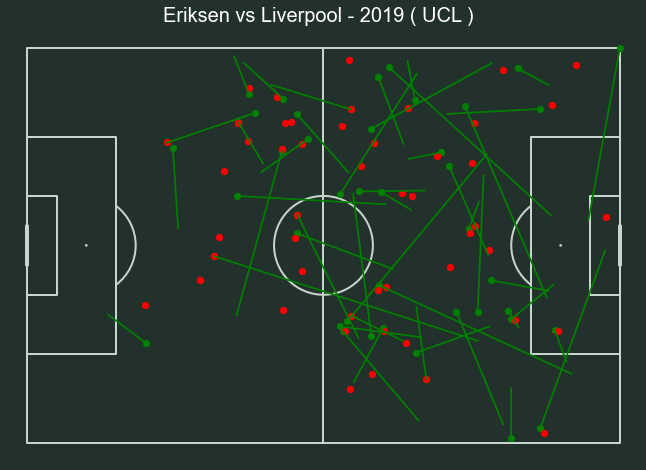

In [308]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc')

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#loop for each event
for x in range(len(spurs_son_passes['x'])):
    if spurs_son_passes['type'][x] == 'Pass':
        plt.plot((spurs_son_passes['x'][x],spurs_son_passes['endX'][x]),(spurs_son_passes['y'][x],spurs_son_passes['endY'][x]),color='green')
        plt.scatter(spurs_son_passes['x'][x],spurs_son_passes['y'][x],color='green')
    if spurs_son_passes['type'][x] == 'Ball Receipt*':
        plt.scatter(spurs_son_passes['x'][x],spurs_son_passes['y'][x],color='red')

plt.title('Eriksen vs Liverpool - 2019 ( UCL )  ',color='white',size=20)